In [14]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print('the shape of training images: ', X_train.shape)
print('the shape of testing images: ', X_test.shape)
print('the shape of training labels: ', y_train.shape)
print('the shape of testing labels: ', y_test.shape)

the shape of training images:  (60000, 28, 28)
the shape of testing images:  (10000, 28, 28)
the shape of training labels:  (60000,)
the shape of testing labels:  (10000,)


**Visualization**

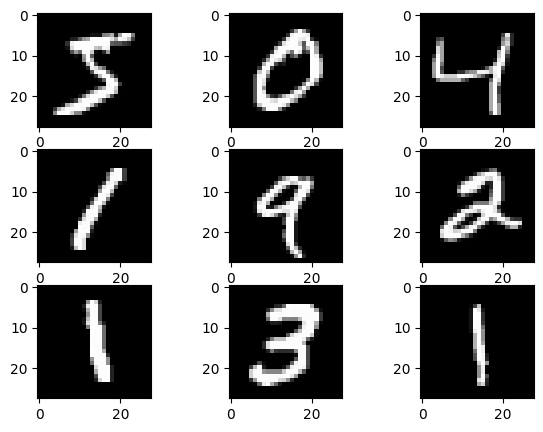

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(7,5))
cnt = 0
for i in range (3):
  for j in range (3):
    axs[i, j].imshow(X_train[cnt], cmap='gray')
    cnt += 1
plt.show()

**Normalization**

In [5]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

**Building the model**

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization()) #optional
# model.add(Dropout(0.2))  #optional
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# loss function : Multicalass clasification:
#sparse categorical -- > labels are intergers / 0, 1, 2 , ...9
# categorical crossentropy --> labels are one hot encoded 0001 / 10000 / ... etc
#--------
#Binary classification:
#binary cross entropy

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8903 - loss: 0.3582 - val_accuracy: 0.9659 - val_loss: 0.1078
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9701 - loss: 0.0981 - val_accuracy: 0.9682 - val_loss: 0.1034
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9801 - loss: 0.0651 - val_accuracy: 0.9751 - val_loss: 0.0818
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0486 - val_accuracy: 0.9782 - val_loss: 0.0788
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9778 - val_loss: 0.0817
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0375 - val_accuracy: 0.9766 - val_loss: 0.0939
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9789 - val_loss: 0.0779
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9929 - loss: 0.0237 -

**model evaluation**

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9739 - loss: 0.1164
Test loss:  0.0927199125289917
Test accuracy:  0.9797999858856201


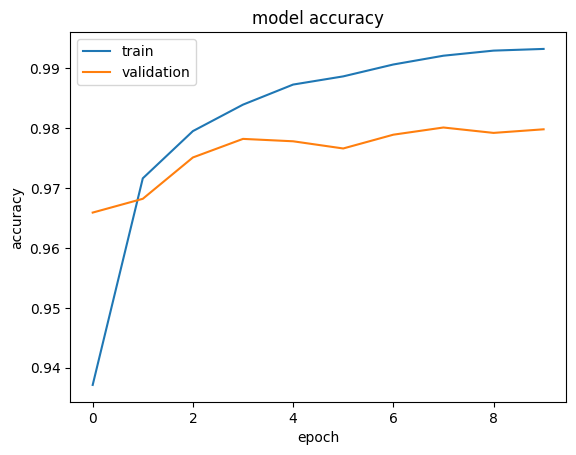

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.9468998e-11, 1.1421836e-09, 5.0123541e-09, ..., 9.9999273e-01,
        6.7151111e-11, 7.1995964e-06],
       [2.3632886e-08, 7.8452453e-05, 9.9991643e-01, ..., 1.3994880e-06,
        7.0645250e-08, 6.2815541e-13],
       [1.7497610e-14, 1.0000000e+00, 1.4192454e-13, ..., 3.3127412e-09,
        1.4278154e-08, 7.5154520e-13],
       ...,
       [9.6871592e-15, 8.3582203e-14, 3.6014245e-12, ..., 5.8346801e-13,
        4.7861693e-12, 2.5609546e-07],
       [3.8770556e-11, 2.3742789e-13, 4.0892574e-15, ..., 1.5121728e-15,
        9.0911492e-09, 3.5728277e-15],
       [1.4385163e-13, 2.2279826e-14, 2.8362463e-13, ..., 7.4358497e-16,
        4.8369229e-11, 8.5251974e-19]], dtype=float32)

In [17]:
print('probabilities: ', y_pred[0])
print('predicted class: ', np.argmax(y_pred[0]))

probabilities:  [4.9468998e-11 1.1421836e-09 5.0123541e-09 8.4242826e-09 6.6558520e-08
 7.3222895e-12 7.9860304e-16 9.9999273e-01 6.7151111e-11 7.1995964e-06]
predicted class:  7


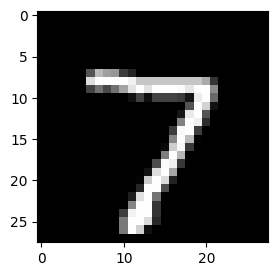

In [19]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0], cmap='gray')

In [20]:
print('actual class: ', y_test[0])

actual class:  7
